In [1]:
import numpy as np
import lib.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [135]:
def my_exp(x,y,w1,w2):
    if (w1 == 0):
        return np.exp( w2*1j*y)
    return np.exp(w1*1j*x + w2*1j*y)

In [140]:
def compare(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi,-np.pi,np.pi,M)
    im = my_exp(x,y,i,j)
    grad_X, grad_Y = grad.fried_model_gradient(im)
    X_H, Y_H = grad.Hudgin_gradien_model(im)
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = data.get_Poisson_noise(grad_X.real, photons) + 1j*data.get_Poisson_noise(grad_X.imag, photons)
        grad_Y = data.get_Poisson_noise(grad_Y.real, photons) + 1j*data.get_Poisson_noise(grad_Y.imag, photons)
        X_H = data.get_Poisson_noise(X_H.real, photons) + 1j*data.get_Poisson_noise(X_H.imag, photons)
        Y_H = data.get_Poisson_noise(Y_H.real, photons) + 1j*data.get_Poisson_noise(Y_H.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, X_H, Y_H)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [151]:
def calc_z (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                if (j*10 <= size):
                    z[i,j] = compare(i,j,M, noised, photons)
                else:
                    break
        else :
            continue
    return z

In [142]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 2)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(2)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    plt.savefig('z-plot')

In [164]:
z = calc_z(6, True, 3)

0


/home/satbek/Course-work-sem7/src/lib/data.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = photons / noised_image.max()
/home/satbek/Course-work-sem7/src/lib/data.py:45: RuntimeWarning: invalid value encountered in multiply
  noised_image = noised_image * scale_factor
/home/satbek/Course-work-sem7/src/lib/data.py:46: RuntimeWarning: invalid value encountered in less
  noised_image = np.random.poisson(noised_image)
/home/satbek/Course-work-sem7/src/lib/data.py:46: RuntimeWarning: invalid value encountered in greater
  noised_image = np.random.poisson(noised_image)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


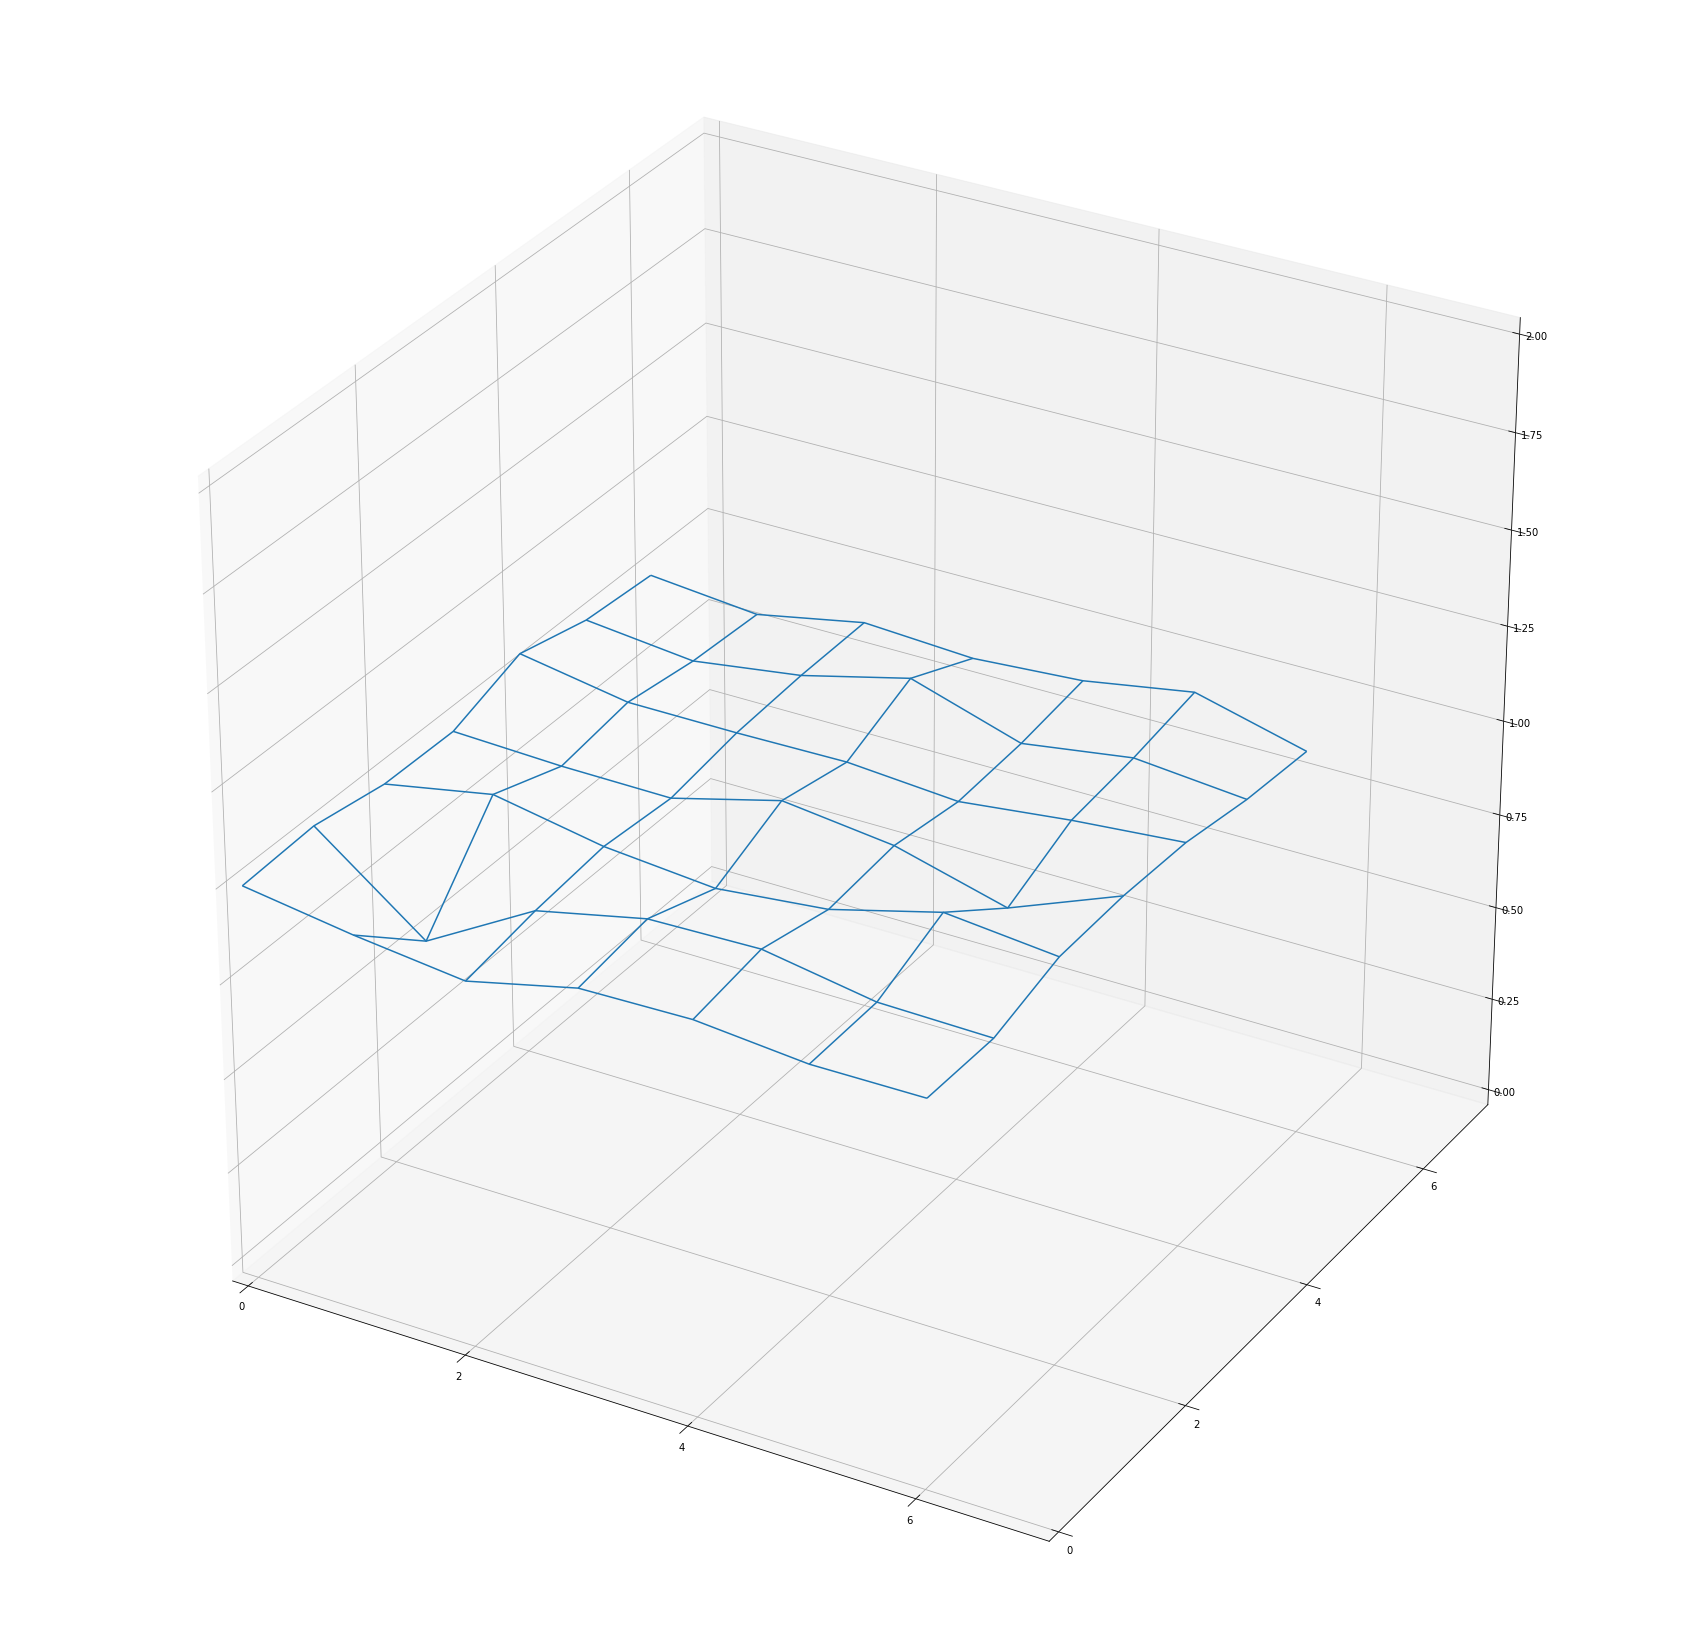

In [163]:
draw_plot(z[0 : z.shape[0] // 10 + 1, 0:z.shape[0] // 10 + 1])

In [47]:
z.shape

(8, 8)

In [153]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi,-np.pi,np.pi,M)
    im = my_exp(x,y,i,j)
    grad_X, grad_Y = i * x * 1j * my_exp(x,y,i,j), j * y * 1j * my_exp(x,y,i,j)
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = poisson_noised(grad_X.real, photons) + 1j*poisson_noised(grad_X.imag, photons)
        grad_Y = poisson_noised(grad_Y.real, photons) + 1j*poisson_noised(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [117]:
def calc_z_ideal (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                print(j)
                if (j*10 <= size):
                    z[i,j] = compare_ideal(i,j,M, noised,photons)
                else:
                    break
        else :
            continue
    return z

In [118]:
z = calc_z_ideal(6, False)

0
0
1
2
3
4
5
6
7
1
0
1
2
3
4
5
6
7
2
0
1
2
3
4
5
6
7
3
0
1
2
3
4
5
6
7
4
0
1
2
3
4
5
6
7
5
0
1
2
3
4
5
6
7
6
0
1
2
3
4
5
6
7
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


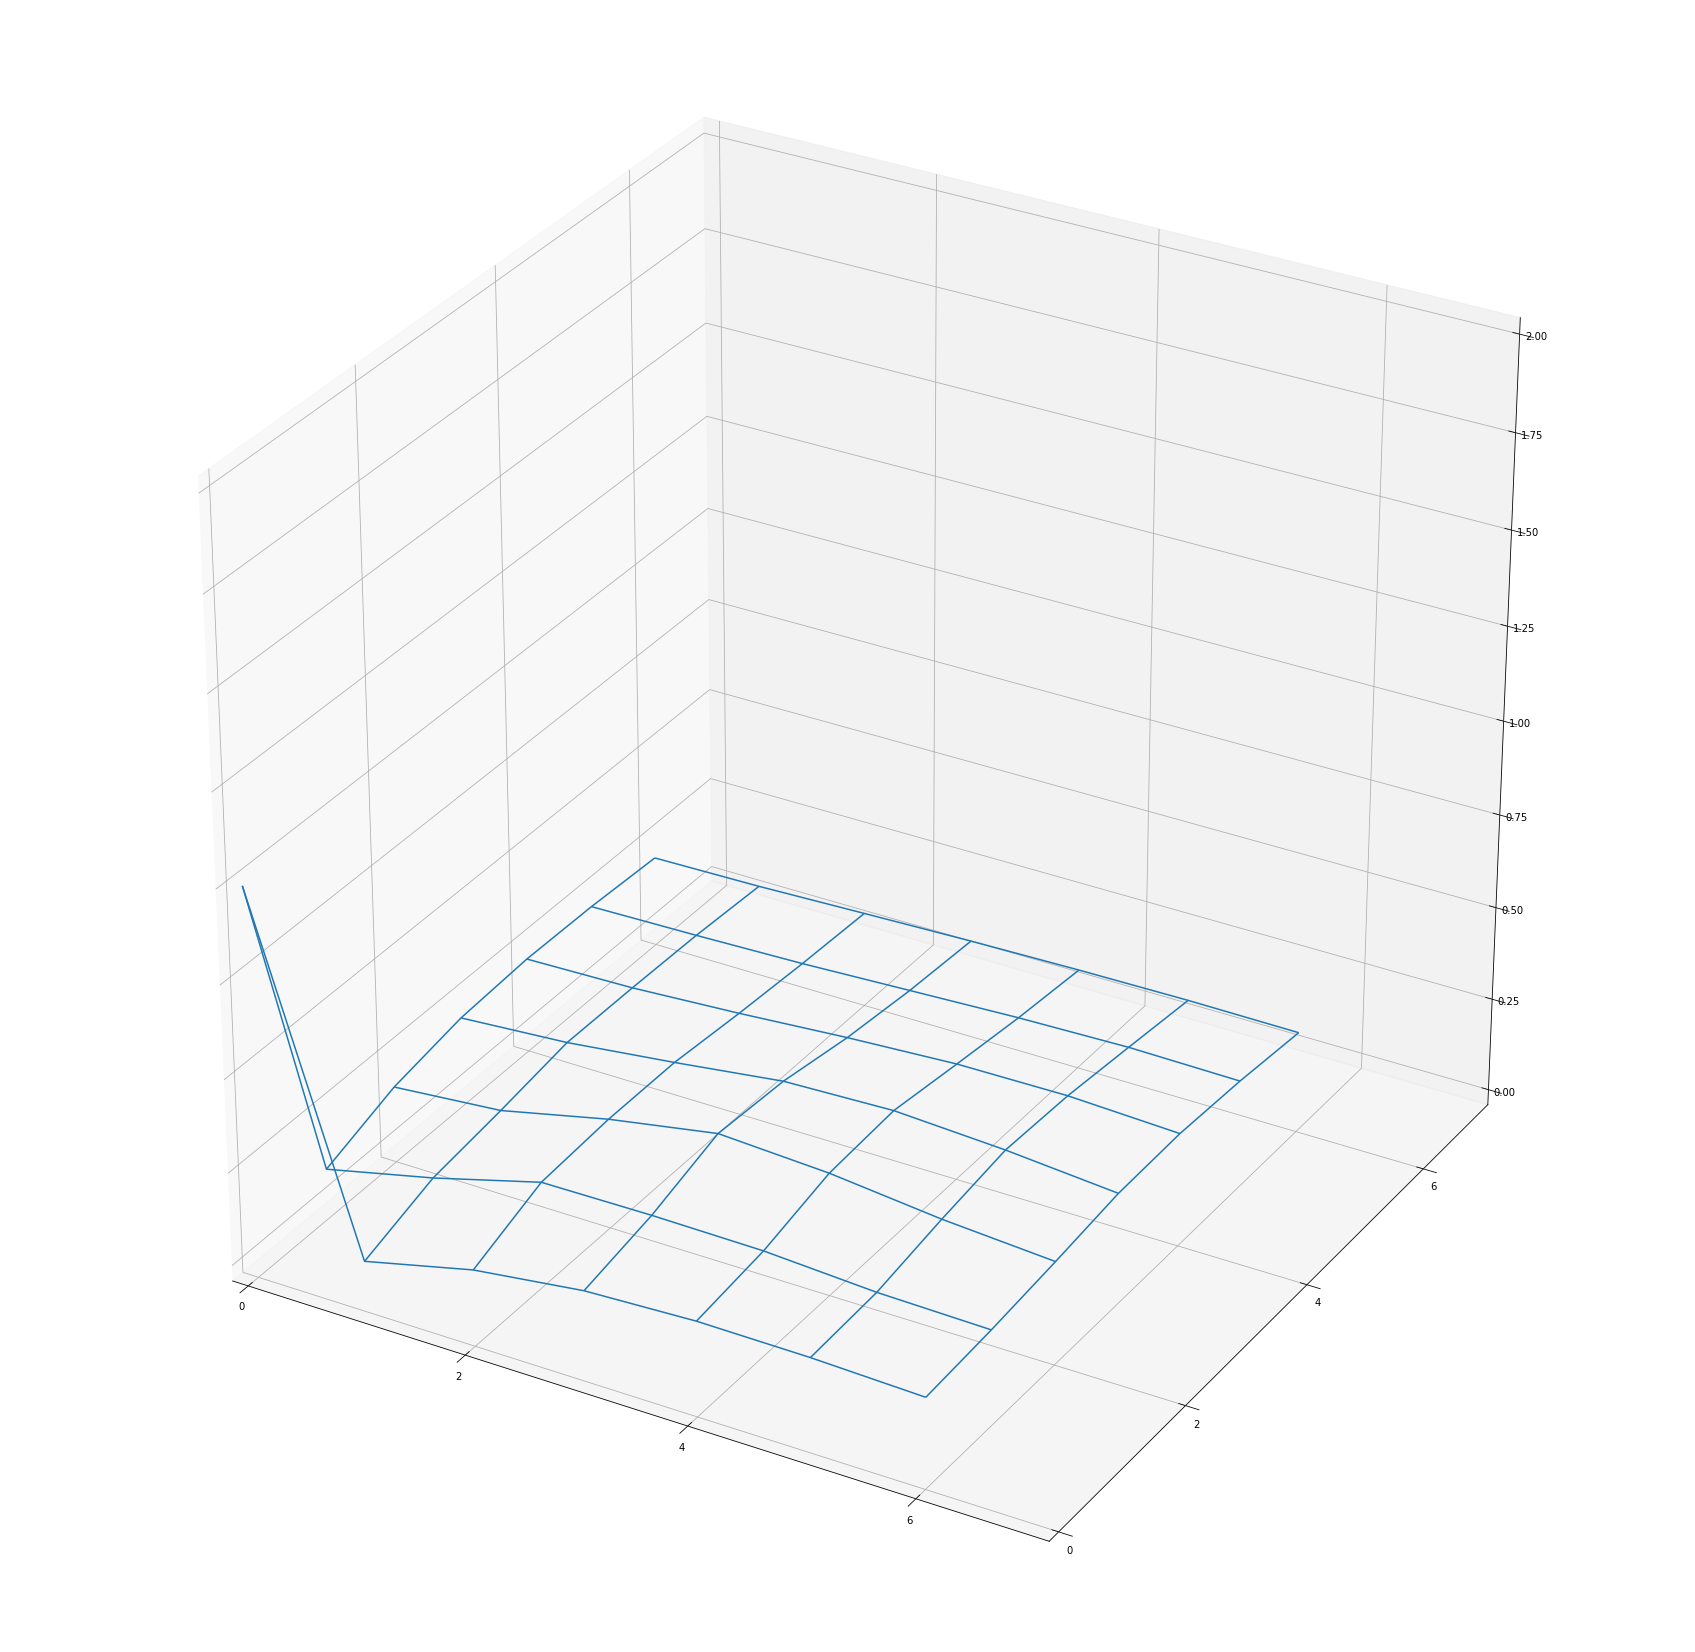

In [120]:
draw_plot(z[0:7,0:7])